In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
import DeltaVar as dv

In [3]:
L = np.loadtxt('../Data/H_estVSsigma/L.txt')

In [4]:
idx = np.array(['00','05','06','07','08','09','10'])
deltavar = []
[deltavar.append(np.loadtxt('../Data/H_estVSsigma/deltavar_s'+i+'.txt')) for i in idx]
print(np.shape(deltavar))

(7, 100, 100)


In [7]:
print(deltavar)

[array([[  1.55147587e+09,   1.55172297e+09,   1.55196597e+09, ...,
          1.53549513e+09,   1.53378368e+09,   1.53203292e+09],
       [  1.53341624e+09,   1.53342307e+09,   1.53343445e+09, ...,
          1.58038205e+09,   1.57894441e+09,   1.57741697e+09],
       [  1.53259091e+09,   1.53250369e+09,   1.53240842e+09, ...,
          1.50513256e+09,   1.50393360e+09,   1.50271012e+09],
       ..., 
       [  1.54143197e+09,   1.54141095e+09,   1.54137885e+09, ...,
          1.46869045e+09,   1.46606636e+09,   1.46342685e+09],
       [  1.53813368e+09,   1.53827379e+09,   1.53841390e+09, ...,
          1.50923102e+09,   1.50901546e+09,   1.50879140e+09],
       [  1.53760765e+09,   1.53770658e+09,   1.53780182e+09, ...,
          1.50919907e+09,   1.50790091e+09,   1.50655199e+09]]), array([[  3.27827502e+08,   3.32375989e+08,   3.36986935e+08, ...,
          1.26709710e+09,   1.28517082e+09,   1.30350540e+09],
       [  3.42337088e+08,   3.47169579e+08,   3.52072796e+08, ...,
       

In [8]:
print(deltavar[0])

[[  1.55147587e+09   1.55172297e+09   1.55196597e+09 ...,   1.53549513e+09
    1.53378368e+09   1.53203292e+09]
 [  1.53341624e+09   1.53342307e+09   1.53343445e+09 ...,   1.58038205e+09
    1.57894441e+09   1.57741697e+09]
 [  1.53259091e+09   1.53250369e+09   1.53240842e+09 ...,   1.50513256e+09
    1.50393360e+09   1.50271012e+09]
 ..., 
 [  1.54143197e+09   1.54141095e+09   1.54137885e+09 ...,   1.46869045e+09
    1.46606636e+09   1.46342685e+09]
 [  1.53813368e+09   1.53827379e+09   1.53841390e+09 ...,   1.50923102e+09
    1.50901546e+09   1.50879140e+09]
 [  1.53760765e+09   1.53770658e+09   1.53780182e+09 ...,   1.50919907e+09
    1.50790091e+09   1.50655199e+09]]


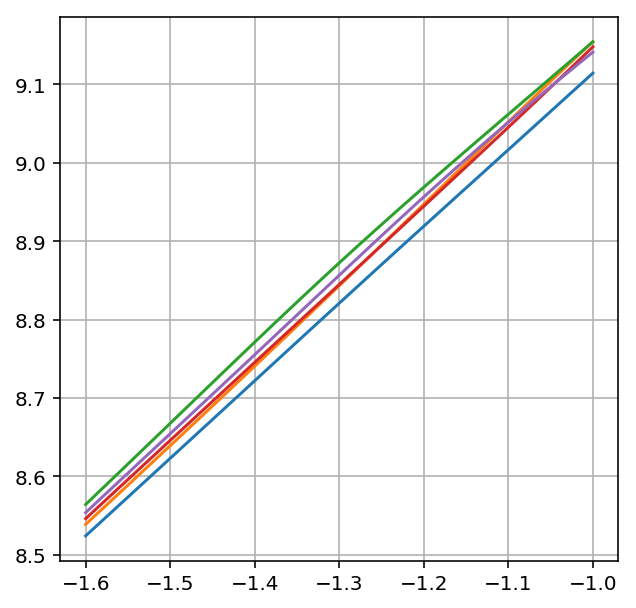

In [25]:
index = np.random.randint(0,100,5)
plt.figure(figsize=(720/144,720/144),dpi = 144)
[plt.plot(np.log10(L),np.log10(deltavar[1][i,:])) for i in index]
plt.grid()
plt.show()

In [27]:
print(len(deltavar[0]))

100


In [28]:
params = []
for i in range(len(deltavar)):
    params_i = []
    for j in range(len(deltavar[0])):
        params_i.append(dv.HurstEstimator(deltavar[i][j,:],L))
    params_i = np.asarray(params_i)
    params.append(params_i)

In [31]:
print(params[0])

[[ -1.61651300e-03   4.16823128e-04  -3.23302600e-03   8.33646255e-04
    9.18721070e+00   1.09350906e-03]
 [  1.65482893e-02   4.94108686e-04   3.30965787e-02   9.88217372e-04
    9.23603221e+00   1.29626325e-03]
 [ -4.84743571e-03   3.41984315e-04  -9.69487142e-03   6.83968631e-04
    9.17088009e+00   8.97174774e-04]
 [ -9.38415968e-03   4.56821948e-04  -1.87683194e-02   9.13643895e-04
    9.15571594e+00   1.19844386e-03]
 [ -1.61485513e-03   2.14287773e-04  -3.22971026e-03   4.28575547e-04
    9.18497682e+00   5.62170545e-04]
 [  4.62232187e-03   6.88201788e-05   9.24464374e-03   1.37640358e-04
    9.19893743e+00   1.80545440e-04]
 [  2.47682432e-03   2.88234885e-04   4.95364863e-03   5.76469770e-04
    9.19139647e+00   7.56166282e-04]
 [  7.38450713e-03   4.06635242e-04   1.47690143e-02   8.13270484e-04
    9.21049864e+00   1.06678223e-03]
 [ -7.02844293e-03   7.75346234e-05  -1.40568859e-02   1.55069247e-04
    9.16492425e+00   2.03407209e-04]
 [ -9.15742596e-03   5.21984477e-04  

In [32]:
idx = np.array(['00','05','06','07','08','09','10'])
[np.savetxt('../Data/H_estVSsigma/H_est_s'+str(idx[i])+'.txt',params[i],header = 'H_est,H_std,A,A_std,B,B_std for H='+str(int(idx[i])/10)) for i in range(len(idx))]

[None, None, None, None, None, None, None]

In [33]:
print(np.shape(params))

(7, 100, 6)


In [34]:
H_est = []
for i in range(len(params)):
    H_est.append(np.array([np.mean(params[i][:,0]),np.std(params[i][:,0])]))

In [35]:
print(H_est)

[array([-0.00410375,  0.00769092]), array([ 0.49325722,  0.00984838]), array([ 0.57078778,  0.07280234]), array([ 0.66875405,  0.07034423]), array([ 0.78017401,  0.08306735]), array([ 0.85321902,  0.06695616]), array([ 0.82894428,  0.03119851])]


In [38]:
H = np.array([0.0,0.5,0.6,0.7,0.8,0.9,1.0])
H_est = np.asarray(H_est)


[[-0.00410375  0.00769092]
 [ 0.49325722  0.00984838]
 [ 0.57078778  0.07280234]
 [ 0.66875405  0.07034423]
 [ 0.78017401  0.08306735]
 [ 0.85321902  0.06695616]
 [ 0.82894428  0.03119851]]


In [39]:
print(np.shape(H_est))

(7, 2)


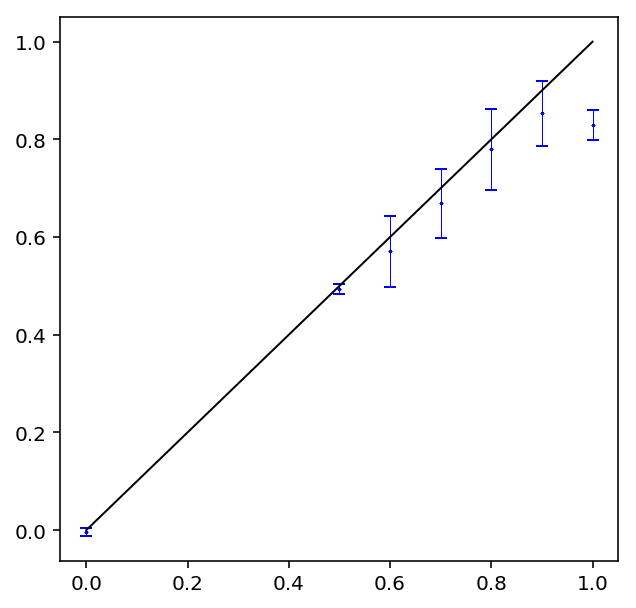

In [78]:
plt.figure(figsize=(720/144,720/144),dpi=144)
plt.errorbar(H,H_est[:,0],yerr = H_est[:,1],c='b', capsize = 3,elinewidth =0.5, fmt = 'none',zorder = 0)
plt.scatter(H,H_est[:,0],c='b',marker='x',zorder = 1,s= 1.0)
plt.plot([0,1],[0,1],c= 'k',linewidth= 1.0)
plt.grid()
plt.show()

In [80]:
X = []
for i in range(100):
    X.append(ss.fBm(1000,2,0.95,exp = False))

C:\Users\Matt\Workshop\PhD\Scripts\SpectralSynthesis.py:57: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


In [ ]:
deltavar = []
for i in range(len(X)):
    deltavar_i = []
    for j in range(len(L)):
        deltavar_i.append(dv.DeltaVar(X[i],L[j],1.5))
        print(i,j)
    deltavar_i = np.asarray(deltavar_i)
    deltavar.append(deltavar_i)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 89
15 90
15 91
15 92
15 93
15 94
15 95
15 96
15 97
15 98
15 99
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 15
16 16
16 17
16 18
16 19
16 20
16 21
16 22
16 23
16 24
16 25
16 26
16 27
16 28
16 29
16 30
16 31
16 32
16 33
16 34
16 35
16 36
16 37
16 38
16 39
16 40
16 41
16 42
16 43
16 44
16 45
16 46
16 47
16 48
16 49
16 50
16 51
16 52
16 53
16 54
16 55
16 56
16 57
16 58
16 59
16 60
16 61
16 62
16 63
16 64
16 65
16 66
16 67
16 68
16 69
16 70
16 71
16 72
16 73
16 74
16 75
16 76
16 77
16 78
16 79
16 80
16 81
16 82
16 83
16 84
16 85
16 86
16 87
16 88
16 89
16 90
16 91
16 92
16 93
16 94
16 95
16 96
16 97
16 98
16 99
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28


29 48
29 49
29 50
29 51
29 52
29 53
29 54
29 55
29 56
29 57
29 58
29 59
29 60
29 61
29 62
29 63
29 64
29 65
29 66
29 67
29 68
29 69
29 70
29 71
29 72
29 73
29 74
29 75
29 76
29 77
29 78
29 79
29 80
29 81
29 82
29 83
29 84
29 85
29 86
29 87
29 88
29 89
29 90
29 91
29 92
29 93
29 94
29 95
29 96
29 97
29 98
29 99
30 0
30 1
30 2
30 3
30 4
30 5
30 6
30 7
30 8
30 9
30 10
30 11
30 12
30 13
30 14
30 15
30 16
30 17
30 18
30 19
30 20
30 21
30 22
30 23
30 24
30 25
30 26
30 27
30 28
30 29
30 30
30 31
30 32
30 33
30 34
30 35
30 36
30 37
30 38
30 39
30 40
30 41
30 42
30 43
30 44
30 45
30 46
30 47
30 48
30 49
30 50
30 51
30 52
30 53
30 54
30 55
30 56
30 57
30 58
30 59
30 60
30 61
30 62
30 63
30 64
30 65
30 66
30 67
30 68
30 69
30 70
30 71
30 72
30 73
30 74
30 75
30 76
30 77
30 78
30 79
30 80
30 81
30 82
30 83
30 84
30 85
30 86
30 87
30 88
30 89
30 90
30 91
30 92
30 93
30 94
30 95
30 96
30 97
30 98
30 99
31 0
31 1
31 2
31 3
31 4
31 5
31 6
31 7
31 8
31 9
31 10
31 11
31 12
31 13
31 14
31 15
31 16
31 17


43 37
43 38
43 39
43 40
43 41
43 42
43 43
43 44
43 45
43 46
43 47
43 48
43 49
43 50
43 51
43 52
43 53
43 54
43 55
43 56
43 57
43 58
43 59
43 60
43 61
43 62
43 63
43 64
43 65
43 66
43 67
43 68
43 69
43 70
43 71
43 72
43 73
43 74
43 75
43 76
43 77
43 78
43 79
43 80
43 81
43 82
43 83
43 84
43 85
43 86
43 87
43 88
43 89
43 90
43 91
43 92
43 93
43 94
43 95
43 96
43 97
43 98
43 99
44 0
44 1
44 2
44 3
44 4
44 5
44 6
44 7
44 8
44 9
44 10
44 11
44 12
44 13
44 14
44 15
44 16
44 17
44 18
44 19
44 20
44 21
44 22
44 23
44 24
44 25
44 26
44 27
44 28
44 29
44 30
44 31
44 32
44 33
44 34
44 35
44 36
44 37
44 38
44 39
44 40
44 41
44 42
44 43
44 44
44 45
44 46
44 47
44 48
44 49
44 50
44 51
44 52
44 53
44 54
44 55
44 56
44 57
44 58
44 59
44 60
44 61
44 62
44 63
44 64
44 65
44 66
44 67
44 68
44 69
44 70
44 71
44 72
44 73
44 74
44 75
44 76
44 77
44 78
44 79
44 80
44 81
44 82
44 83
44 84
44 85
44 86
44 87
44 88
44 89
44 90
44 91
44 92
44 93
44 94
44 95
44 96
44 97
44 98
44 99
45 0
45 1
45 2
45 3
45 4
45 5
45

57 26
57 27
57 28
57 29
57 30
57 31
57 32
57 33
57 34
57 35
57 36
57 37
57 38
57 39
57 40
57 41
57 42
57 43
57 44
57 45
57 46
57 47
57 48
57 49
57 50
57 51
57 52
57 53
57 54
57 55
57 56
57 57
57 58
57 59
57 60
57 61
57 62
57 63
57 64
57 65
57 66
57 67
57 68
57 69
57 70
57 71
57 72
57 73
57 74
57 75
57 76
57 77
57 78
57 79
57 80
57 81
57 82
57 83
57 84
57 85
57 86
57 87
57 88
57 89
57 90
57 91
57 92
57 93
57 94
57 95
57 96
57 97
57 98
57 99
58 0
58 1
58 2
58 3
58 4
58 5
58 6
58 7
58 8
58 9
58 10
58 11
58 12
58 13
58 14
58 15
58 16
58 17
58 18
58 19
58 20
58 21
58 22
58 23
58 24
58 25
58 26
58 27
58 28
58 29
58 30
58 31
58 32
58 33
58 34
58 35
58 36
58 37
58 38
58 39
58 40
58 41
58 42
58 43
58 44
58 45
58 46
58 47
58 48
58 49
58 50
58 51
58 52
58 53
58 54
58 55
58 56
58 57
58 58
58 59
58 60
58 61
58 62
58 63
58 64
58 65
58 66
58 67
58 68
58 69
58 70
58 71
58 72
58 73
58 74
58 75
58 76
58 77
58 78
58 79
58 80
58 81
58 82
58 83
58 84
58 85
58 86
58 87
58 88
58 89
58 90
58 91
58 92
58 93
58

71 15
71 16
71 17
71 18
71 19
71 20
71 21
71 22
71 23
71 24
71 25
71 26
71 27
71 28
71 29
71 30
71 31
71 32
71 33
71 34
71 35
71 36
71 37
71 38
71 39
71 40
71 41
71 42
71 43
71 44
71 45
71 46
71 47
71 48
71 49
71 50
71 51
71 52
71 53
71 54
71 55
71 56
71 57
71 58
71 59
71 60
71 61
71 62
71 63
71 64
71 65
71 66
71 67
71 68
71 69
71 70
71 71
71 72
71 73
71 74
71 75
71 76
71 77
71 78
71 79
71 80
71 81
71 82
71 83
71 84
71 85
71 86
71 87
71 88
71 89
71 90
71 91
71 92
71 93
71 94
71 95
71 96
71 97
71 98
71 99
72 0
72 1
72 2
72 3
72 4
72 5
72 6
72 7
72 8
72 9
72 10
72 11
72 12
72 13
72 14
72 15
72 16
72 17
72 18
72 19
72 20
72 21
72 22
72 23
72 24
72 25
72 26
72 27
72 28
72 29
72 30
72 31
72 32
72 33
72 34
72 35
72 36
72 37
72 38
72 39
72 40
72 41
72 42
72 43
72 44
72 45
72 46
72 47
72 48
72 49
72 50
72 51
72 52
72 53
72 54
72 55
72 56
72 57
72 58
72 59
72 60
72 61
72 62
72 63
72 64
72 65
72 66
72 67
72 68
72 69
72 70
72 71
72 72
72 73
72 74
72 75
72 76
72 77
72 78
72 79
72 80
72 81
72 82
72